In [142]:
# https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_USDKRW&page=5

# https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_EURKRW&page=2

# https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_JPYKRW&page=3

In [143]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


code_in = int(input('통합유형 선택(0:USD, 1:EUR, 2:JPY)'))

currency_symbols = ['USD', 'EUR', 'JPY']
currency_name = ['미국 달러', '유럽연합 유로', '일본 엔(100)']

code = currency_symbols[code_in]

df = pd.DataFrame()
for page_num in range(1,11):
    base_url = f"https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_{code}KRW&page={page_num}"
    tamp = pd.read_html(base_url, encoding='cp949', header=1)
    
    df = pd.concat([df, tamp[0]])
    
    
# 데이터 표시

print(f'=========={currency_name[code_in]}-{code}==========')
print(df.head(20))


==========미국 달러-USD==========
           날짜   매매기준율  전일대비     사실 때     파실 때   보내실 때   받으실 때
0  2024.06.27  1386.3   8.2  1410.56  1362.04  1399.8  1372.8
1  2024.06.26  1394.5   2.5  1418.90  1370.10  1408.1  1380.9
2  2024.06.25  1392.0   4.0  1416.36  1367.64  1405.6  1378.4
3  2024.06.24  1388.0   3.0  1412.29  1363.71  1401.6  1374.4
4  2024.06.21  1391.0   1.0  1415.34  1366.66  1404.6  1377.4
5  2024.06.20  1392.0   9.0  1416.36  1367.64  1405.6  1378.4
6  2024.06.19  1383.0   1.0  1407.20  1358.80  1396.5  1369.5
7  2024.06.18  1382.0   0.0  1406.18  1357.82  1395.5  1368.5
8  2024.06.17  1382.0   7.0  1406.18  1357.82  1395.5  1368.5
9  2024.06.14  1389.0  11.0  1413.30  1364.70  1402.6  1375.4
0  2024.06.13  1378.0   5.0  1402.11  1353.89  1391.5  1364.5
1  2024.06.12  1373.0   7.0  1397.02  1348.98  1386.4  1359.6
2  2024.06.11  1380.0   4.0  1404.15  1355.85  1393.5  1366.5
3  2024.06.10  1376.0   5.0  1400.08  1351.92  1389.4  1362.6
4  2024.06.07  1381.0   8.0  1405.16  13

In [144]:
tamp[0]

,날짜,매매기준율,전일대비,사실 때,파실 때,보내실 때,받으실 때
0,2024.02.14,1332.0,10.5,1355.31,1308.69,1345.0,1319.0
1,2024.02.13,1342.5,10.5,1365.99,1319.01,1355.6,1329.4
2,2024.02.08,1332.0,3.0,1355.31,1308.69,1345.0,1319.0
3,2024.02.07,1329.0,0.5,1352.25,1305.75,1342.0,1316.0
4,2024.02.06,1328.5,7.0,1351.74,1305.26,1341.5,1315.5
5,2024.02.05,1335.5,3.0,1358.87,1312.13,1348.5,1322.5
6,2024.02.02,1338.5,7.5,1361.92,1315.08,1351.6,1325.4
7,2024.02.01,1331.0,4.0,1354.29,1307.71,1344.0,1318.0
8,2024.01.31,1335.0,4.0,1358.36,1311.64,1348.0,1322.0
9,2024.01.30,1331.0,3.5,1354.29,1307.71,1344.0,1318.0


In [145]:
code_in = int(input('통합유형 선택(0:USD, 1:EUR, 2:JPY)'))

currency_symbols = ['USD', 'EUR', 'JPY']
currency_name = ['미국 달러', '유럽연합 유로', '일본 엔(100)']

currency_symbols[code_in]

'USD'

In [146]:
df.columns

Index(['날짜', '매매기준율', '전일대비', '사실 때', '파실 때', '보내실 때', '받으실 때'], dtype='object')

In [147]:
# 원하는 열만 추출
df_total = df[['날짜', '매매기준율', '사실 때', '파실 때', '보내실 때', '받으실 때']]

In [148]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      100 non-null    object 
 1   매매기준율   100 non-null    float64
 2   사실 때    100 non-null    float64
 3   파실 때    100 non-null    float64
 4   보내실 때   100 non-null    float64
 5   받으실 때   100 non-null    float64
dtypes: float64(5), object(1)
memory usage: 5.5+ KB


In [149]:
# 날짜 -> object 임  숫자로 변환 날짜형으로 변환

df_total_chart = df_total.copy()


In [150]:
# pandas 로 차트를 만들때 인덱스가 X 축임. 
# 날짜를 인덱스로 
df_total_chart = df_total_chart.set_index('날짜')

In [151]:
# 최신데이터와 과거데이터의 순서를 바꿈. 역순으로 표시
df_total_chart=df_total_chart[::-1]

In [152]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')

<Axes: title={'center': 'exchange rate'}, xlabel='날짜'>

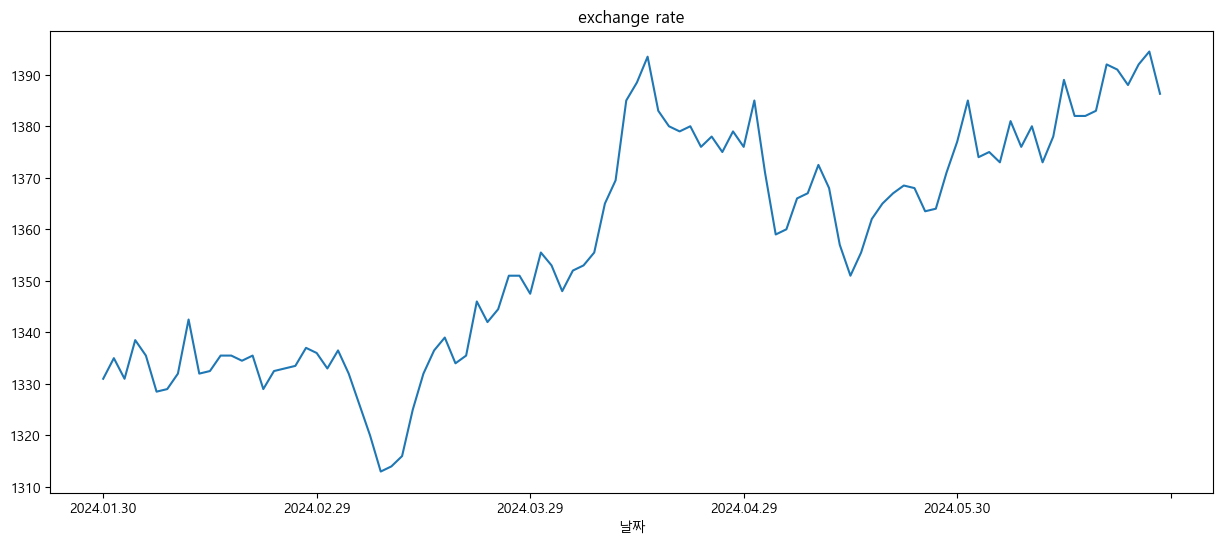

In [153]:

df_total_chart['매매기준율'].plot(figsize=(15, 6), title='exchange rate')

#### 월별 검색

In [154]:
df_total

,날짜,매매기준율,사실 때,파실 때,보내실 때,받으실 때
0,2024.06.27,1386.3,1410.56,1362.04,1399.8,1372.8
1,2024.06.26,1394.5,1418.90,1370.10,1408.1,1380.9
2,2024.06.25,1392.0,1416.36,1367.64,1405.6,1378.4
3,2024.06.24,1388.0,1412.29,1363.71,1401.6,1374.4
4,2024.06.21,1391.0,1415.34,1366.66,1404.6,1377.4
...,...,...,...,...,...,...
5,2024.02.05,1335.5,1358.87,1312.13,1348.5,1322.5
6,2024.02.02,1338.5,1361.92,1315.08,1351.6,1325.4
7,2024.02.01,1331.0,1354.29,1307.71,1344.0,1318.0
8,2024.01.31,1335.0,1358.36,1311.64,1348.0,1322.0


In [155]:
# 날짜 열 형변환(문자열 -> 날짜형식) 
# replace 바꾸기 값하나 변경시  
#df_total=df_total['날짜'].replace('.','')

df_total['날짜']=df_total['날짜'].str.replace(".","").astype('datetime64[ms]')

In [156]:

df_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      100 non-null    datetime64[ms]
 1   매매기준율   100 non-null    float64       
 2   사실 때    100 non-null    float64       
 3   파실 때    100 non-null    float64       
 4   보내실 때   100 non-null    float64       
 5   받으실 때   100 non-null    float64       
dtypes: datetime64[ms](1), float64(5)
memory usage: 5.5 KB


In [157]:
# '월' 파생변수 생성 
df_total['월'] = df_total['날짜'].dt.month
# df_total['월'] = df_total['날짜'].dt.year

In [158]:
df_total

,날짜,매매기준율,사실 때,파실 때,보내실 때,받으실 때,월
0,2024-06-27,1386.3,1410.56,1362.04,1399.8,1372.8,6
1,2024-06-26,1394.5,1418.90,1370.10,1408.1,1380.9,6
2,2024-06-25,1392.0,1416.36,1367.64,1405.6,1378.4,6
3,2024-06-24,1388.0,1412.29,1363.71,1401.6,1374.4,6
4,2024-06-21,1391.0,1415.34,1366.66,1404.6,1377.4,6
...,...,...,...,...,...,...,...
5,2024-02-05,1335.5,1358.87,1312.13,1348.5,1322.5,2
6,2024-02-02,1338.5,1361.92,1315.08,1351.6,1325.4,2
7,2024-02-01,1331.0,1354.29,1307.71,1344.0,1318.0,2
8,2024-01-31,1335.0,1358.36,1311.64,1348.0,1322.0,1


In [159]:
month_in = int(input('검색할 월 입력>>'))

month_df = df_total.loc[df_total['월'] == month_in, ['날짜', '매매기준율', '사실 때','파실 때',	'보내실 때','받으실 때'	]]


In [160]:
month_df = month_df.reset_index(drop=True)

In [161]:
#df_total[::-1].reset_index(drop=True)

In [162]:
month_df_chart = month_df.copy()

In [163]:
month_df_chart = month_df_chart.set_index('날짜')

<Axes: xlabel='날짜'>

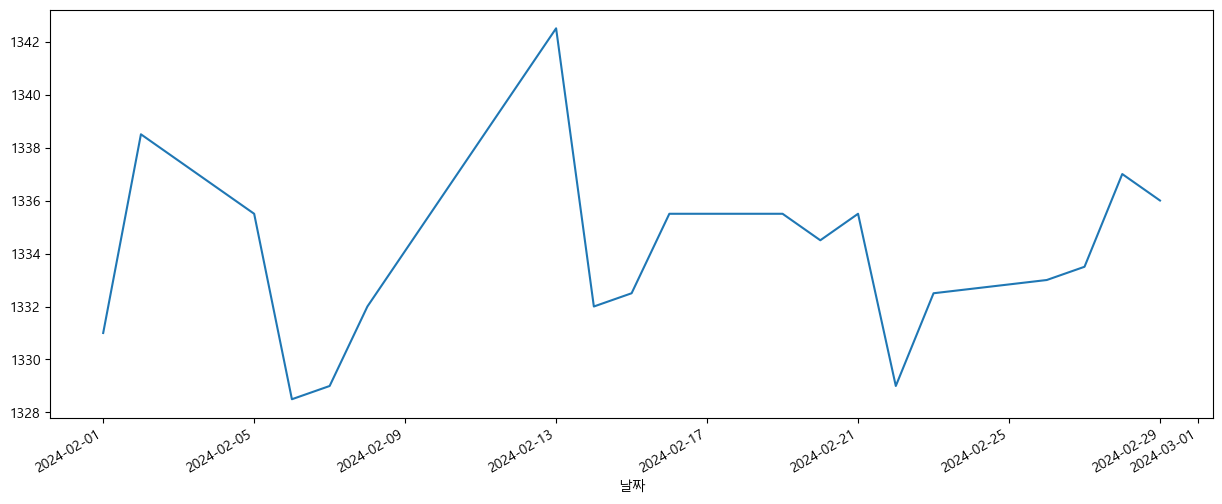

In [164]:
month_df_chart['매매기준율'].plot(figsize=(15,6))